# Module 1: Introduction to Scikit-Learn

## Section 2: Supervised Learning Algorithms

### Part 7: Support Vector Machines (SVM)

In this section, we will explore Support Vector Machines (SVM), a powerful supervised learning algorithm used for both classification and regression tasks.

### 7.1 Understanding Support Vector Machines

Support Vector Machines work by find the best hyperplane (decision boundary) to separate data points of different classes. The hyperplane is selected such that the margin between the classes is maximized. Support vectors are the data points that lie closest to the decision boundary.

In a two-dimensional space (with two features), a hyperplane is a line that separates data points of different classes. In higher dimensions, a plane becomes a hyperplane. SVM aims to find the hyperplane that maximizes the margin, which is the distance between the hyperplane and the nearest data points of each class. 

SVM can handle nonlinear relationships by using kernel functions. A kernel function transforms the original feature space into a higher-dimensional space where data points become more separable. Common kernels include the linear kernel (for linearly separable data), polynomial kernel, and radial basis function (RBF) kernel. The choice of the kernel function (e.g., linear, polynomial, RBF) depends on the characteristics of the data and the desired decision boundary shape.

In real-world scenarios, data might not be perfectly separable. SVM introduces a soft margin that allows some misclassification to improve generalization. The C parameter controls the trade-off between maximizing the margin and minimizing the misclassification of training data. Smaller C values allow more misclassification (larger margin), while larger C values try to classify all points correctly (smaller margin).

### 7.2 Support Vector Classifier (SVC) and Support Vector Regressor (SVR)

SVC is a specific implementation of SVM for classification tasks. SVC aims to find a hyperplane that maximizes the margin between different classes while correctly classifying as many data points as possible. The classifier considers only the support vectors, which are the data points closest to the hyperplane. These support vectors determine the hyperplane's position and orientation. The output of an SVC is a predicted class label for each data point. Given a new set of input features, the SVC will assign a class label to each data point based on the learned decision boundary. The predicted class labels can be used for various purposes, such as making predictions, evaluating the model's performance, and understanding the separation of different classes.

Support Vector Regressor (SVR) is another variant of the SVM algorithm, designed for regression tasks instead of classification. SVR aims to find a hyperplane that minimizes the margin between predicted and actual values while satisfying a specified margin of error (epsilon tube). Similar to SVC, SVR also uses support vectors to determine the hyperplane's position and orientation. The output of an SVR is a predicted target value for each data point. In regression tasks, SVR aims to predict continuous numerical values. Given a set of input features, the SVR will predict the target value for each data point. The predicted target values can be used to assess the model's accuracy in terms of predicting numerical outcomes.

In summary, while Support Vector Classifier (SVC) is used for binary classification tasks, Support Vector Regressor (SVR) is used for regression tasks. Both algorithms utilize support vectors to find optimal hyperplanes that best fit the data points while considering the margin of tolerance and regularization.

### 7.3 Training and Evaluation

To train an SVM model, we need a labeled dataset with the target variable and the corresponding feature values. The model learns the optimal hyperplane or decision boundary that separates the classes or best fits the regression data.

Once trained, we can evaluate the model's performance using evaluation metrics suitable for classification or regression tasks.

For classification tasks (SVC), you can use accuracy, precision, recall, sensitivity, true Positive Rate), F1-Score, Confusion Matrix...

For regression tasks (SVR), you can use mean absolute error (MAE), mean squared error (MSE), root mean squared error (RMSE), r-squared (Coefficient of Determination), residual plots...

Both for SVC and SVR, it's crucial to perform cross-validation. This involves splitting the data into multiple folds, training the model on some folds, and testing on others. Cross-validation helps assess the model's generalization performance and minimizes overfitting. For both types of models, you might need to perform hyperparameter tuning. Use techniques like grid search to search through different combinations of hyperparameters and select the ones that yield the best results on cross-validation data.

#### Example of SVC


Test Set Metrics:
Accuracy: 0.8416666666666667
Precision: 0.7611940298507462
Recall: 0.9444444444444444
F1-score: 0.8429752066115703


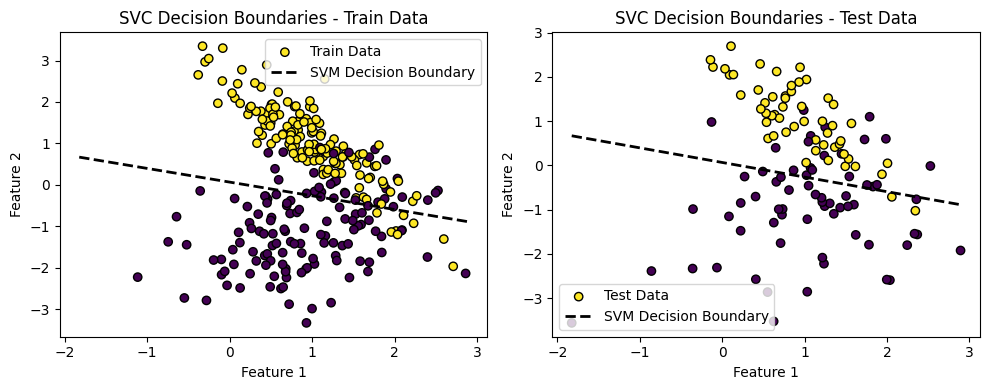

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Generate synthetic data for binary classification
X, y = make_classification(n_samples=400, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM model with a linear kernel
svm = SVC(kernel='linear')
# Train the model on the training data
svm.fit(X_train_scaled, y_train)

# Calculate test set metrics
y_pred_test = svm.predict(X_test_scaled)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
# Print test set metrics
print("\nTest Set Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_test)

# Extract coefficients and intercept from the SVM model
coef = svm.coef_[0]
intercept = svm.intercept_[0]
# Calculate the slope and intercept of the decision boundary line
slope = -coef[0] / coef[1]
intercept_boundary = -intercept / coef[1]

# Plot the decision boundaries, data points, support vectors, and SVM line
plt.figure(figsize=(10, 4))
# Plot for training points
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolors='k', label='Train Data')
# Plot the SVM decision boundary line
plt.plot([min(X[:, 0]), max(X[:, 0])], 
         [slope * min(X[:, 0]) + intercept_boundary, slope * max(X[:, 0]) + intercept_boundary],
         color='black', linestyle='dashed', linewidth=2, label='SVM Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('SVC Decision Boundaries - Train Data')

# Plot for testing points
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolors='k', label='Test Data')
# Plot the SVM decision boundary line
plt.plot([min(X[:, 0]), max(X[:, 0])], 
         [slope * min(X[:, 0]) + intercept_boundary, slope * max(X[:, 0]) + intercept_boundary],
         color='black', linestyle='dashed', linewidth=2, label='SVM Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('SVC Decision Boundaries - Test Data')
plt.tight_layout()  # Adjust the layout
plt.show()

#### Example of SVR


Test Set Metrics:
Mean Absolute Error: 14.173390194421625
Mean Squared Error: 297.2602090420078
R-squared: 0.8302109970851278


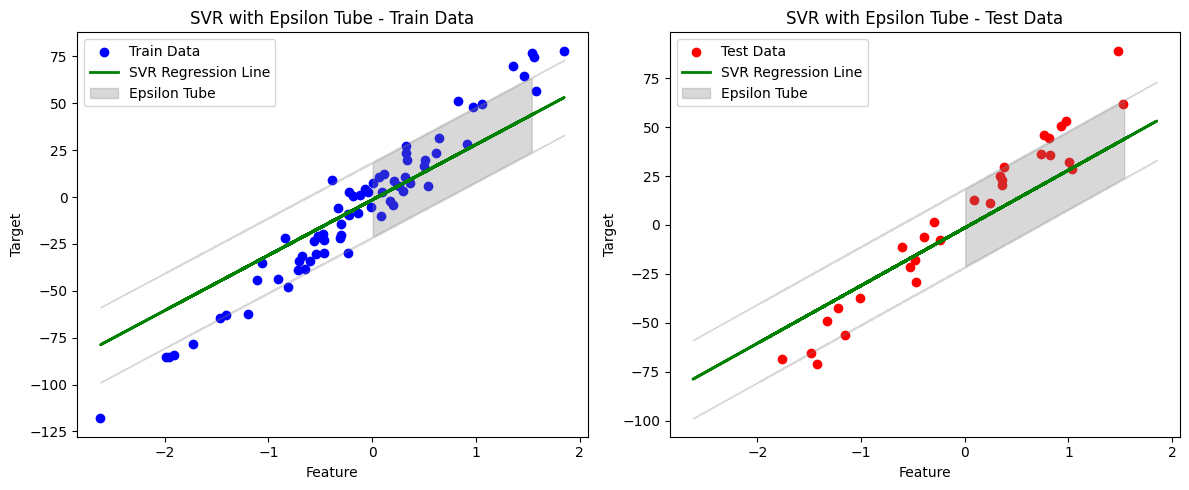

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Generate synthetic data for regression
X, y = make_regression(n_samples=100, n_features=1, n_informative=1,
                       noise=10, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVR model with a linear kernel and specified epsilon value
epsilon_value = 20
svr = SVR(kernel='linear', epsilon=epsilon_value)
# Train the model on the training data
svr.fit(X_train_scaled, y_train)

# Predict target values for training and testing data
y_pred_train = svr.predict(X_train_scaled)
y_pred_test = svr.predict(X_test_scaled)

# Calculate evaluation metrics
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
# Print evaluation metrics
print("\nTest Set Metrics:")
print("Mean Absolute Error:", mae_test)
print("Mean Squared Error:", mse_test)
print("R-squared:", r2_test)

# Plot the SVR regression line, data points, and epsilon tube for training and testing data
plt.figure(figsize=(12, 5))
# Plot for training points
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.plot(X_train, y_pred_train, color='green', linewidth=2, label='SVR Regression Line')
plt.fill_between(X_train[:, 0], y_pred_train - epsilon_value, y_pred_train + epsilon_value,
                 color='gray', alpha=0.3, label='Epsilon Tube')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.title('SVR with Epsilon Tube - Train Data')

# Plot for testing points
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_train, y_pred_train, color='green', linewidth=2, label='SVR Regression Line')
plt.fill_between(X_train[:, 0], y_pred_train - epsilon_value, y_pred_train + epsilon_value,
                 color='gray', alpha=0.3, label='Epsilon Tube')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.title('SVR with Epsilon Tube - Test Data')
plt.tight_layout()  # Adjust the layout
plt.show()

In this example, we generate synthetic regression data and fit an SVR model to it. We evaluate the model using Mean Absolute Error, Mean Squared Error, and R-squared metrics. Finally, we visualize the SVR regression line, data points, and how well the SVR model fits the data.

### 7.4 Conclusion

Support Vector Machines (SVM) are powerful supervised learning algorithms for classification and regression tasks. SVM aims to find the optimal hyperplane that separates the classes or best fits the regression data. Scikit-Learn provides the necessary classes to implement SVM easily. Understanding the concepts, training, and evaluation techniques are crucial for effectively using SVM in practice.

In the next part, we will explore Naive Bayes classifiers, a family of probabilistic classifiers commonly used for classification tasks.

Feel free to practice implementing Support Vector Machines (SVM) using Scikit-Learn. Experiment with different kernels, hyperparameter settings, and evaluation metrics to gain a deeper understanding of the algorithm and its performance.